# Assignment #6

# 1. K-means from scratch (30 points)

Code up the K-means algorithm. To test your code, use both the two bivariate Gaussian distributions as well as the initial centroids defined below. After predicting the cluster to which each data point belongs, make a scatter plot of the predicted cluster for each data point. For consistency, set the random seed to 1 before sampling from the two bivariate Gaussian distributions.

* Bivariate Gaussians
$$\mathbf{\mu_1} = \begin{bmatrix}
1.0\\
0.1\\
\end{bmatrix}$$

$$\mathbf{\mu_2} = \begin{bmatrix}
-5.0\\
2.0\\
\end{bmatrix}$$

$$\mathbf{\Sigma_1} = \mathbf{\Sigma_2} = \begin{bmatrix}
1.0&0.2\\
0.2&1.0\\
\end{bmatrix}$$

* Initial centroids:
$$\mathbf{c_1} = \begin{bmatrix}
0.4\\
0.3\\
\end{bmatrix}$$

$$\mathbf{c_2} = \begin{bmatrix}
0.1\\
0.4\\
\end{bmatrix}$$

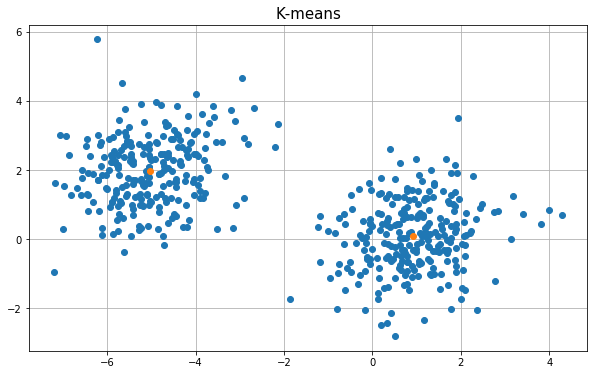

In [9]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(1)
mean = np.array([1.0,0.1])
cov = np.array([[1.0,0.2],[0.2,1.0]])
X0 = np.random.multivariate_normal(mean,cov,250)
X0 = X0.ravel().reshape(250, 2, 1)
mean = np.array([-5.0,2.0])
cov = np.array([[1.0,0.2],[0.2,1.0]])
X1 = np.random.multivariate_normal(mean,cov,250)
X1 = X1.ravel().reshape(250, 2, 1)
X = np.concatenate((X0,X1),axis=0)

def kmeans(c1, c2, sam):
    sum1 = 0
    sum2 = 0
    n1 = 0
    n2 = 0
    for i in range(len(sam)):
        d1 = ((sam[i][0]-c1[0])**2+(sam[i][1]-c1[1])**2)**(1/2)
        d2 = ((sam[i][0]-c2[0])**2+(sam[i][1]-c2[1])**2)**(1/2)
        if d1 > d2:
            sum2 += sam[i]
            n2 += 1
        elif d1 < d2:
            sum1 += sam[i]
            n1 += 1
    if n1 != 0:
        nc1 = sum1/n1
    elif n1 == 0:
        nc1 = np.array([[0],[0]])
    if n2 != 0:
        nc2 = sum2/n2
    elif n2 == 0:
        nc2 = np.array([[0],[0]])
    return(nc1, nc2)

def fkmeans(a, b, c, d, sam):
    c1 = np.array([[a],[b]])
    c2 = np.array([[c],[d]])
    fc1 = kmeans(c1, c2, sam)[0]
    fc2 = kmeans(c1, c2, sam)[1]
    while float(fc1[0]) != float(c1[0]) and float(fc1[1]) != float(c1[1]) and float(fc2[0]) != float(c2[0]) and float(fc2[1]) != float(c2[1]):
        c1 = fc1
        c2 = fc2
        kmeans(c1, c2, sam)
        fc1 = kmeans(c1, c2, sam)[0]
        fc2 = kmeans(c1, c2, sam)[1]
    return(c1, c2, fc1, fc2)

cf1 = fkmeans(0.4, 0.3, 0.1, 0.4, X)[0]
cf2 = fkmeans(0.4, 0.3, 0.1, 0.4, X)[1]
cf1 = cf1.reshape(2,1)
cf2 = cf2.reshape(2,1)
cff = np.stack((cf1, cf2))

plt.figure(figsize=(10,6))
plt.title('K-means', fontsize = 15)
plt.plot(X[:,0],X[:,1],'o')
plt.plot(cff[:,0],cff[:,1],'o')
plt.grid('on')
plt.show()

# 2. Find the optimal K  (50 pts)

In this problem you wil find the minimum number of clusters ($k$) that is necessary to ensure the maps reproduced from the K-means centroid values fall within a pre-defined performance criteria. 

1. Subset and regrid the datasets below by extracting the bounding box minlat=39.0, minlon=-106.5, maxlat=41.0, maxlon=-104.5 and upscaling the data to a 0.01 arcdegree spatial resolution using -r average.

    * **Annual mean precipitation (mm/year)** - */data/PRISM/PRISM_ppt_30yr_normal_800mM2_annual/PRISM_ppt_30yr_normal_800mM2_annual_bil.bil*
    * **Annual mean temperature (C)** - */data/PRISM/PRISM_tmean_30yr_normal_800mM2_annual/PRISM_tmean_30yr_normal_800mM2_annual_bil.bil*
    * **Elevation (m)** - */data/NED/NED.vrt ../Workspace/dem.tif*
    * **Sand (%)** - */data/POLARIS/sand_0_5.vrt*
    * **Soil porosity (%)** - */data/POLARIS/porosity_0_5.vrt*
    * **Saturated hydraulic conductivity (cm/hr)** - */data/POLARIS/ksat_0_5.vrt*
    * **Bare cover fraction (%)** - */data/USGS30m/bare2010/bare2010.vrt*
    * **Tree cover fraction (%)** - */data/USGS30m/treecover2010/treecover2010.vrt*
    
    
2. Construct an algorithm that computes the minimum number of clusters necessary to ensure that the maps reproduced using the K-means computed centroids all have a KGE $\geq$ 0.7. Report the optimal number of clusters. To ensure the results are reproduceable, set the random seed to 1. Remember to normalize your data prior to clustering ($z = \frac{x - min(x)}{max(x) - min(x)}$). Within K-means set the parameter n_init to 10.

> The KGE is Kling Gupta Efficieny metric is defined as:

$$\text{KGE} = 1 - \sqrt{(\rho-1)^2 + (\frac{\sigma_{org}}{\sigma_{sim}} - 1)^2 + (\frac{\mu_{org}}{\mu_{sim}} - 1)^2}$$

> Where $\rho$ is the Pearson correlation between the original and simulated maps, $\sigma_x$ is the standard deviation of a given map, and $\mu_x$ is the arithmetic mean of a given map.

3. Repeat part 2, except this time standardize your data instead of normalizing ($z = \frac{x - \mu_x}{\sigma_x}$).

4. Repeat part 3, except this time set n_init to 1. Explain why the optimal number of clusters is different from that in part 3.

In [1]:
%%bash 
gdalwarp -te -106.5 39 -104.5 41 -tr 0.01 0.01 -r average -overwrite /data/PRISM/PRISM_ppt_30yr_normal_800mM2_annual/PRISM_ppt_30yr_normal_800mM2_annual_bil.bil /home/jovyan/work/notes/annual_precip.tif
gdalwarp -te -106.5 39 -104.5 41 -tr 0.01 0.01 -r average -overwrite /data/PRISM/PRISM_tmean_30yr_normal_800mM2_annual/PRISM_tmean_30yr_normal_800mM2_annual_bil.bil /home/jovyan/work/notes/annual_temp.tif
gdalwarp -overwrite -r average -te -106.5 39 -104.5 41 -tr 0.01 0.01 /data/NED/NED.vrt /home/jovyan/work/notes/dem.tif
gdalwarp -te -106.5 39 -104.5 41 -tr 0.01 0.01 -r average -overwrite /data/POLARIS/sand_0_5.vrt /home/jovyan/work/notes/sand.tif
gdalwarp -te -106.5 39 -104.5 41 -tr 0.01 0.01 -r average -overwrite /data/POLARIS/porosity_0_5.vrt /home/jovyan/work/notes/soil.tif
gdalwarp -te -106.5 39 -104.5 41 -tr 0.01 0.01 -r average -overwrite /data/POLARIS/ksat_0_5.vrt /home/jovyan/work/notes/conductivity.tif
gdalwarp -te -106.5 39 -104.5 41 -tr 0.01 0.01 -r average -overwrite /data/USGS30m/bare2010/bare2010.vrt /home/jovyan/work/notes/barecover.tif
gdalwarp -te -106.5 39 -104.5 41 -tr 0.01 0.01 -r average -overwrite /data/USGS30m/treecover2010/treecover2010.vrt /home/jovyan/work/notes/treecover.tif

Creating output file that is 200P x 200L.
Processing /data/PRISM/PRISM_ppt_30yr_normal_800mM2_annual/PRISM_ppt_30yr_normal_800mM2_annual_bil.bil [1/1] : 0Using internal nodata values (e.g. -9999) for image /data/PRISM/PRISM_ppt_30yr_normal_800mM2_annual/PRISM_ppt_30yr_normal_800mM2_annual_bil.bil.
Copying nodata values from source /data/PRISM/PRISM_ppt_30yr_normal_800mM2_annual/PRISM_ppt_30yr_normal_800mM2_annual_bil.bil to destination /home/jovyan/work/notes/annual_precip.tif.
...10...20...30...40...50...60...70...80...90...100 - done.
Creating output file that is 200P x 200L.
Processing /data/PRISM/PRISM_tmean_30yr_normal_800mM2_annual/PRISM_tmean_30yr_normal_800mM2_annual_bil.bil [1/1] : 0Using internal nodata values (e.g. -9999) for image /data/PRISM/PRISM_tmean_30yr_normal_800mM2_annual/PRISM_tmean_30yr_normal_800mM2_annual_bil.bil.
Copying nodata values from source /data/PRISM/PRISM_tmean_30yr_normal_800mM2_annual/PRISM_tmean_30yr_normal_800mM2_annual_bil.bil to destination /home

In [2]:
import rasterio
import numpy as np

data = {}
file1 = '/home/jovyan/work/notes/annual_precip.tif'
file2 = '/home/jovyan/work/notes/annual_temp.tif'
file3 = '/home/jovyan/work/notes/dem.tif'
file4 = '/home/jovyan/work/notes/sand.tif'
file5 = '/home/jovyan/work/notes/soil.tif'
file6 = '/home/jovyan/work/notes/conductivity.tif'
file7 = '/home/jovyan/work/notes/barecover.tif'
file8 = '/home/jovyan/work/notes/treecover.tif'

data['precip'] = rasterio.open(file1).read(1)
data['temp'] = rasterio.open(file2).read(1)
data['dem'] = rasterio.open(file3).read(1)
data['sand'] = rasterio.open(file4).read(1)
data['soil'] = rasterio.open(file5).read(1)
data['conductivity'] = rasterio.open(file6).read(1)
data['barecover'] = rasterio.open(file7).read(1)
data['treecover'] = rasterio.open(file8).read(1)

In [3]:
import sklearn.cluster
import matplotlib.pyplot as plt
import scipy.stats

v0 = data['dem'].reshape(data['dem'].size)
v1 = data['precip'].reshape(data['precip'].size)
v2 = data['temp'].reshape(data['temp'].size)
v3 = data['sand'].reshape(data['sand'].size)
v4 = data['soil'].reshape(data['soil'].size)
v5 = data['conductivity'].reshape(data['conductivity'].size)
v6 = data['barecover'].reshape(data['barecover'].size)
v7 = data['treecover'].reshape(data['treecover'].size)

X = np.stack((v0,v1,v2,v3,v4,v5,v6,v7)).T
X1 = ((X - np.min(X,axis=0))/(np.max(X,axis=0)-np.min(X,axis=0)))
X2 = ((X - np.mean(X,axis=0))/np.std(X,axis=0))
X2 = np.abs(X2)

In [4]:
def kge(x, y):
    return(1-((scipy.stats.pearsonr(x,y)[0]-1)**2+(np.std(x)/np.std(y)-1)**2+(np.mean(x)/np.mean(y)-1)**2)**(1/2))

def mkge(k, M, n):
    res = []
    np.random.seed(1)
    model = sklearn.cluster.KMeans(n_clusters=k, n_init = n)
    idx = np.random.choice(np.arange(M.shape[0]),5000)
    Xs = M[idx,:]
    model.fit(Xs)
    clusters = model.predict(M)
    Xpred = np.copy(M)
    for i in range(k):
        m = clusters == i
        Xpred[m,:] = np.mean(M[m,:],axis=0)
    for j in range(8):
        res.append(kge(M[:,j],Xpred[:,j]))
    return(res)

def find(a, b, data, n):
    for k in range(a, b):
        if np.min(mkge(k, data, n)) >= 0.7:
            print(k)
            break
        else:
            continue

In [5]:
find(2, 100, X1, 10)
find(2, 100, X2, 10)
find(2, 100, X2, 1)
print('The minimum number of clusters for normalized data is, with n_init = 10, is:', 47)
print('The minimum number of clusters for standardized data, with n_init = 10, is:', 22)
print('The minimum number of clusters for standardized data, with n_init = 1, is:', 21)
print('Explanation: The optimal number of clusters is different from that of part 2 because n_init parameter defines the number of times it is run, the smaller the n_init, the less accurate the result would be, and thus there is a difference in the optimal number of clusters.')

47
22
21
The minimum number of clusters for normalized data is, with n_init = 10, is: 47
The minimum number of clusters for standardized data, with n_init = 10, is: 22
The minimum number of clusters for standardized data, with n_init = 1, is: 21
Explanation: The optimal number of clusters is different from that of part 2 because n_init parameter defines the number of times it is run, the smaller the n_init, the less accurate the result would be, and thus there is a difference in the optimal number of clusters.


# 3. Choose the right clustering approach (20 points)

The file `/data/HydroLakes/watermask_46.4_46.5_-96_-95.9.tif` is a map of lakes in the bounding box minlon = -96, maxlon = -95.9, minlat = 46.4, and maxlat = 46.5 at a 30 meter spatial resolution. All pixels that belong to a lake are assigned 1 while every pixel that is not part of a lake is set to 0. In this problem we will use cluster analysis to group together contiguous pixels to uniquely define all the lakes in the map. 

1. After reading in and preprocessing the data for use in cluster analysis, use the following cluster algorithms with the given associated parameters to cluster the data:


    * Agglomerative Clustering with single linkage (n_clusters=25)
    * DBSCAN (eps = 5, min_samples = 10)
    * K-Means (n_clusters = 25)
    * Gaussian Mixture Model (n_components = 25)


2. Provide a scatter plot of the results of each algorithm. The color of each point on the scatter plot should be associated with a cluster. 


3. Discuss the results with an emphasis on explaining the strengths and deficiencies of each algorithm in the context of clustering the lakes. 


4. Having aseembled the clusters, compute and report the mean and standard deviation of the area of the 25 lakes. 

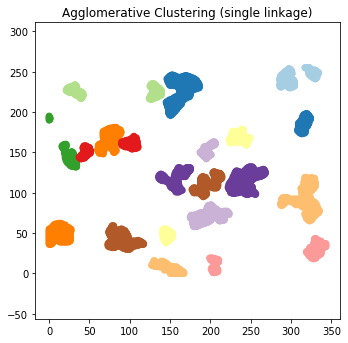

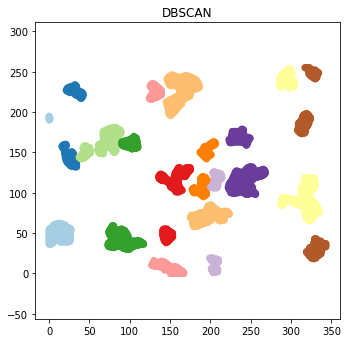

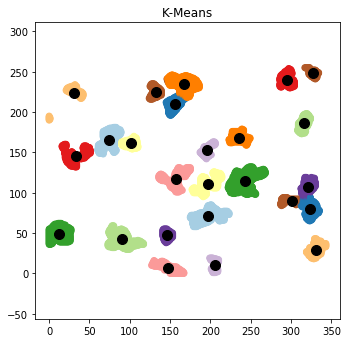

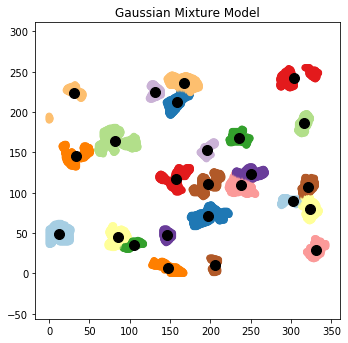

In [6]:
import numpy as np
import rasterio
import sklearn.cluster
import sklearn.mixture
import matplotlib.pyplot as plt

file = '/data/HydroLakes/watermask_46.4_46.5_-96_-95.9.tif'
fp = rasterio.open(file)
X = fp.read(1)
x,y = np.where(X == 1)
X = np.stack((x,y)).T

#Agglomerative Clustering with single linkage
k = 25
model = sklearn.cluster.AgglomerativeClustering(n_clusters=k,linkage='single')
clusters = model.fit_predict(X)
plt.figure(figsize=(12,12))
plt.subplot(2,2,1)
plt.title('Agglomerative Clustering (single linkage)',fontsize=12)
plt.scatter(X[:,0],X[:,1],c=clusters,cmap=plt.get_cmap('Paired'))
plt.axis('equal')
plt.show()

#DBSCAN
model = sklearn.cluster.DBSCAN(eps=5, min_samples=10)
clusters = model.fit_predict(X)
plt.figure(figsize=(12,12))
plt.subplot(2,2,2)
plt.title('DBSCAN',fontsize=12)
plt.scatter(X[:,0],X[:,1],c=clusters,cmap=plt.get_cmap('Paired'))
plt.axis('equal')
plt.show()

#K-Means
k = 25
model = sklearn.cluster.KMeans(n_clusters=k)
clusters = model.fit_predict(X)
plt.figure(figsize=(12,12))
plt.subplot(2,2,3)
plt.title('K-Means',fontsize=12)
plt.scatter(X[:,0],X[:,1],c=clusters,cmap=plt.get_cmap('Paired'))
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],c='k',s=100)
plt.axis('equal')
plt.show()

#Gaussian Mixture Model
k = 25
model = sklearn.mixture.GaussianMixture(n_components=k)
clusters = model.fit_predict(X)
plt.figure(figsize=(12,12))
plt.subplot(2,2,4)
plt.title('Gaussian Mixture Model',fontsize=12)
plt.scatter(X[:,0],X[:,1],c=clusters,cmap=plt.get_cmap('Paired'))
plt.scatter(model.means_[:,0],model.means_[:,1],c='k',s=100)
plt.axis('equal')
plt.show()

In [7]:
print('Based on the results, Agglomerative Clustering Algorithm is better at handling non-elliptical shapes as the shapes of the lakes are mostly non-elliptical. Its deficiency is that it has difficulty handling clusters of different sizes and non-globular shapes, and so for this case, the clusters that are relatively small may have bad performances.')
print('DBSCAN Algorithm is better at handling clusters of different sizes and shapes, but it relies too much on the density of data, and thus the data that is realtively less densed may get ignored.')
print('K-Means Algorithm is better at clustering spherical shapes of similar magnitudes, which I think makes it probably not a good method for this question, because all the shapes of the lakes are similar to spherical shapes and their areas are all close, at least not too far away from each other. The disadvantage is that it has difficulty assigning border data points.')
print('Gaussian Mixture Model Algorithm is better at fitting clusters to non-spherical shapes, which is good for the case of this problem. Its deficiency is that it is not computationally scalable.')

Based on the results, Agglomerative Clustering Algorithm is better at handling non-elliptical shapes as the shapes of the lakes are mostly non-elliptical. Its deficiency is that it has difficulty handling clusters of different sizes and non-globular shapes, and so for this case, the clusters that are relatively small may have bad performances.
DBSCAN Algorithm is better at handling clusters of different sizes and shapes, but it relies too much on the density of data, and thus the data that is realtively less densed may get ignored.
K-Means Algorithm is better at clustering spherical shapes of similar magnitudes, which I think makes it probably not a good method for this question, because all the shapes of the lakes are similar to spherical shapes and their areas are all close, at least not too far away from each other. The disadvantage is that it has difficulty assigning border data points.
Gaussian Mixture Model Algorithm is better at fitting clusters to non-spherical shapes, which is

In [8]:
ilist = []
for i in range(0, 25):
    ilist.append(np.where(clusters == i))
flist = []
for i in range(len(ilist)):
    flist.append(len(ilist[i][0])*30*30)
print('The mean of the area of the 25 lakes:', np.mean(flist), 'm^2')
print('The standard deviation of the area of the 25 lakes:', np.std(flist), 'm^2')

The mean of the area of the 25 lakes: 308592.0 m^2
The standard deviation of the area of the 25 lakes: 142752.44283724183 m^2
